In [3]:
install.packages("tm")  
install.packages("SnowballC") 
install.packages("wordcloud")  
install.packages("RColorBrewer") 
install.packages("syuzhet") 
install.packages("ggplot2") 


Installing package into 'C:/Users/fatim/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tm' successfully unpacked and MD5 sums checked


ERROR: Error in unpackPkgZip(foundpkgs[okp, 2L], foundpkgs[okp, 1L], lib, libs_only, : ERROR: failed to lock directory 'C:\Users\fatim\AppData\Local\R\win-library\4.2' for modifying
Try removing 'C:\Users\fatim\AppData\Local\R\win-library\4.2/00LOCK'


In [4]:

library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("syuzhet")
library("ggplot2")
library("stringr")


Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate




In [5]:

# Read the TextData file
text <- readLines(file.choose("C:\\Users\\fatim\\OneDrive\\Documents\\PreScreen_r3_pw - 1234\\PreScreen_r3\\Q3_Essay.txt"))


Warning message in readLines(file.choose("C:\\Users\\fatim\\OneDrive\\Documents\\PreScreen_r3_pw - 1234\\PreScreen_r3\\Q3_Essay.txt")):
"incomplete final line found on 'C:\Users\fatim\OneDrive\Documents\PreScreen_r3_pw - 1234\PreScreen_r3\Q3_Essay.txt'"


 [1] "As a term, data analytics predominantly refers to an assortment of applications, from basic business"   
 [2] "intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced"      
 [3] "analytics. In that sense, it's similar in nature to business analytics, another umbrella term for"      
 [4] "approaches to analyzing data -- with the difference that the latter is oriented to business uses, while"
 [5] "data analytics has a broader focus. The expansive view of the term isn't universal, though: In some"    
 [6] "cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate"    
 [7] "category. Data analytics initiatives can help businesses increase revenues, improve operational"        
 [8] "efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to"         
 [9] "emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of"        
[

[1] 22

[1] 15 13 15 17 17 15 11 12 17 12 15 18 15 13 16 22 16 14 14 13 14  5

In [8]:

# Check for length of TextData
length(text)


[1] 22

In [9]:
# Count Number of Words in TextData String
split <- strsplit(text, " ")
sapply( split , length)


[1] 15 13 15 17 17 15 11 12 17 12 15 18 15 13 16 22 16 14 14 13 14  5

In [22]:
# Total sum of words in TextData
sum(sapply( split , length))

[1] 319

In [10]:
# Load the data as a corpus
TextDoc <- Corpus(VectorSource(text))


In [11]:

# Cleaning up TextData by replacing "/", "@" and "|" with space
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
TextDoc <- tm_map(TextDoc, toSpace, "/")
TextDoc <- tm_map(TextDoc, toSpace, "@")
TextDoc <- tm_map(TextDoc, toSpace, "\\|")


Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "/"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "@"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "\\|"):
"transformation drops documents"


In [7]:

# Convert the text to lower case
TextDoc <- tm_map(TextDoc, content_transformer(tolower))


Warning message in tm_map.SimpleCorpus(TextDoc, content_transformer(tolower)):
"transformation drops documents"


In [12]:

# Remove numbers
TextDoc <- tm_map(TextDoc, removeNumbers)


Warning message in tm_map.SimpleCorpus(TextDoc, removeNumbers):
"transformation drops documents"


In [13]:

# Remove english common stopwords
TextDoc <- tm_map(TextDoc, removeWords, stopwords("english"))


Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, stopwords("english")):
"transformation drops documents"


In [14]:

#TextDoc <- tm_map(TextDoc, removeWords, c("s", "company","team")) 

# Remove punctuations
TextDoc <- tm_map(TextDoc, removePunctuation)


Warning message in tm_map.SimpleCorpus(TextDoc, removePunctuation):
"transformation drops documents"


In [15]:

# Eliminate extra white spaces
TextDoc <- tm_map(TextDoc, stripWhitespace)


Warning message in tm_map.SimpleCorpus(TextDoc, stripWhitespace):
"transformation drops documents"


In [23]:

# Text stemming - which reduces words to their root form
TextDoc <- tm_map(TextDoc, stemDocument)


Warning message in tm_map.SimpleCorpus(TextDoc, stemDocument):
"transformation drops documents"


In [25]:
length(TextDoc)

[1] 22

In [32]:
# Count character "Data" in TextData
str_count(TextDoc, "data")

Warning message in stri_count_regex(string, pattern, opts_regex = opts(pattern)):
"argument is not an atomic vector; coercing"


[1] 15  0  0

In [33]:
lengths(gregexpr("\\W+", TextDoc)) + 1

[1] 217   4   2

In [28]:
# Count Number of Words in TextData String
split <- strsplit(TextDoc, " ")
sapply( split , length)


ERROR: Error in strsplit(TextDoc, " "): non-character argument


In [24]:

# Build a term-document matrix
TextDoc_dtm <- TermDocumentMatrix(TextDoc)
dtm_m <- as.matrix(TextDoc_dtm)
print(head(dtm_m))


        Docs
Terms    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22
  analyt 1 1 2 0 1 2 1 0 0  0  0  1  1  0  0  0  0  1  0  0  0  0
  applic 1 0 0 0 0 0 0 0 0  1  0  0  0  0  0  0  0  0  0  0  0  0
  assort 1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0
  basic  1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0
  busi   1 0 1 1 0 0 1 0 0  1  0  0  0  0  0  0  0  0  0  0  0  0
  data   1 0 0 1 1 1 1 0 0  1  0  1  2  2  1  0  2  2  1  0  1  0


In [19]:

# Sort by descearing value of frequency
dtm_v <- sort(rowSums(dtm_m),decreasing=TRUE)
dtm_d <- data.frame(word = names(dtm_v),freq=dtm_v)


In [20]:

# Display the top 5 most frequent words
print(dtm_d, 5)


                     word freq
data                 data   18
analyt             analyt   11
analysi           analysi    6
busi                 busi    5
can                   can    5
term                 term    3
use                   use    3
the                   the    3
applic             applic    2
advanc             advanc    2
process           process    2
analyz             analyz    2
approach         approach    2
focus               focus    2
view                 view    2
separ               separ    2
market             market    2
eda                   eda    2
exploratori   exploratori    2
includ             includ    2
cda                   cda    2
statist           statist    2
compar             compar    2
work                 work    2
qualit             qualit    2
assort             assort    1
basic               basic    1
predomin         predomin    1
refer               refer    1
form                 form    1
intellig         intellig    1
olap    

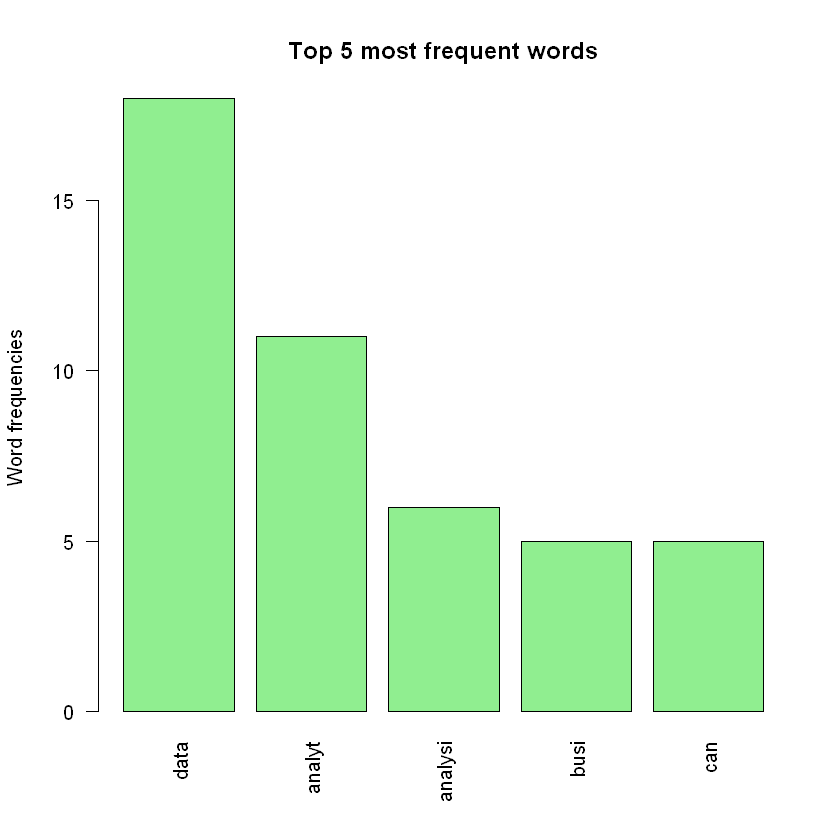

In [21]:

# Plot the most frequent words
barplot(dtm_d[1:5,]$freq, las = 2, names.arg = dtm_d[1:5,]$word,
        col ="lightgreen", main ="Top 5 most frequent words",
        ylab = "Word frequencies")


